<a href="https://colab.research.google.com/github/UN-GCPDS/curso_IA_CHEC/blob/main/Modulo2/cuadernos/Clasificaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

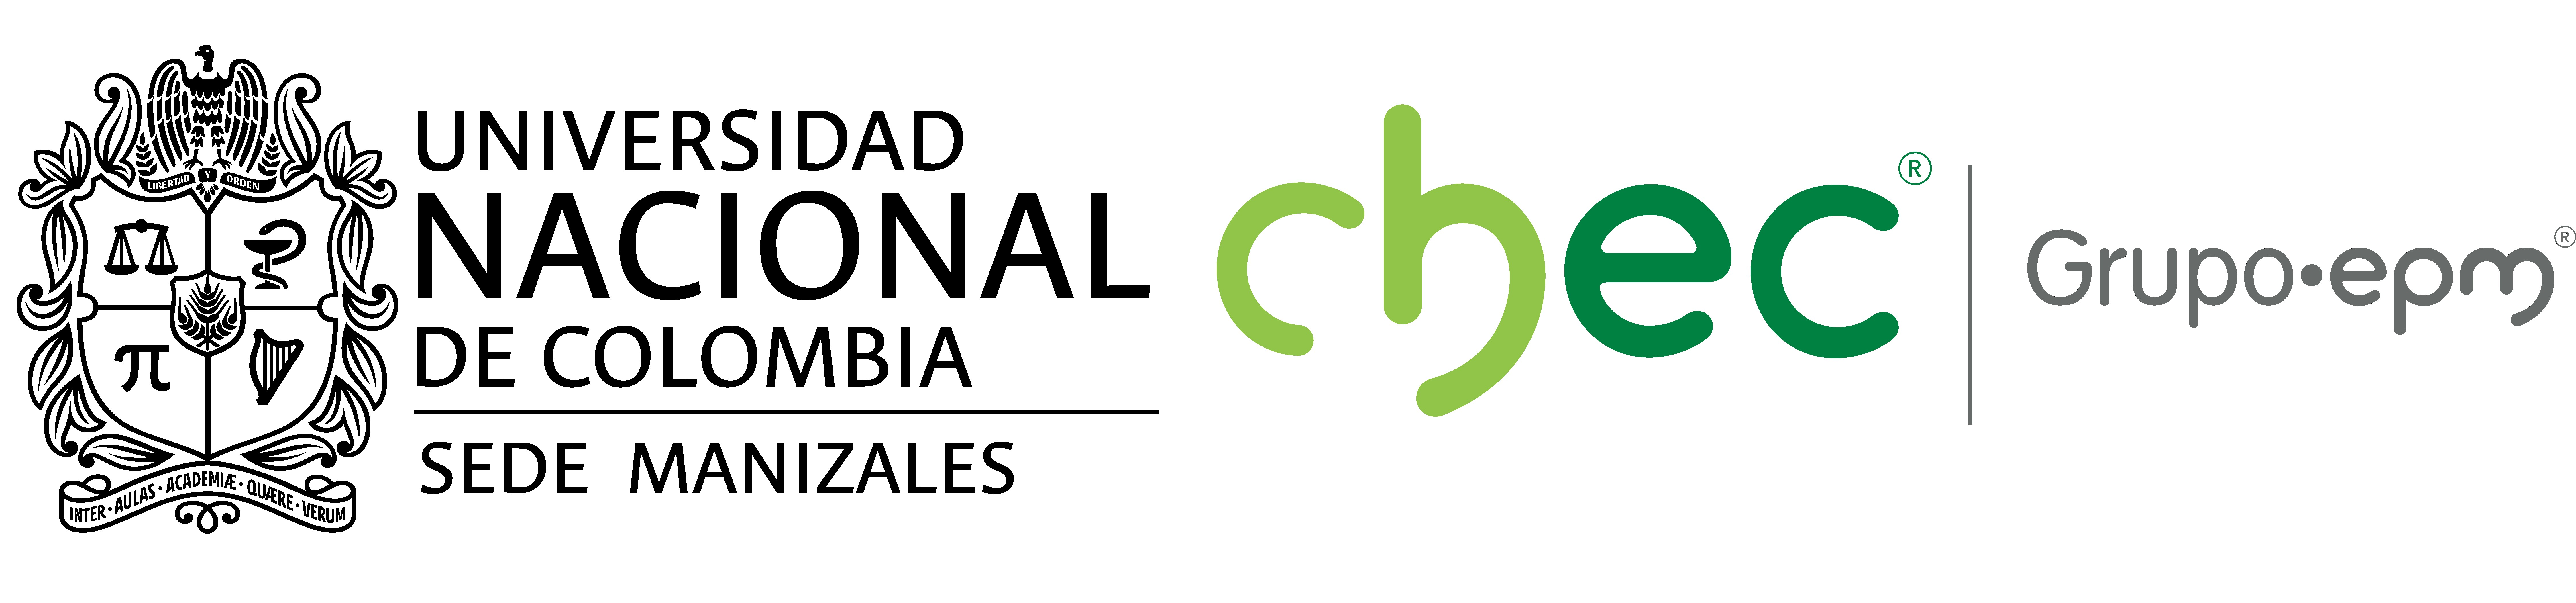
# **MÓDULO 2: Aprendizaje supervisado no supervisado**

## **Descripción**

Aplicación de modelos de aprendizaje de máquina para el estudio de datos tabulares por métodos supervisados y no supervisados.

### **Profesor - Sesión 1 y 2:** German Castellanos-Dominguez y Diego Armando Pérez Rosero
### **Monitores - Sesión 1 y 2:** Danna Valentina Salazar Dubois, Juan Camilo Lugo Rojas y Lucas Miguel Iturriago Salas

**Sesión 1:**
La clasificación es una herramienta clave en muchos campos, y en el ámbito de la transmisión de energía, su relevancia es fundamental para la detección de fallos. En los sistemas de potencia, cualquier fallo o **interrupción** puede tener consecuencias graves, como cortes de energía, daños en los equipos o incluso riesgos para la seguridad. Por ello, la capacidad de **detectar** y **clasificar** fallos de manera rápida y precisa es crucial para garantizar el funcionamiento continuo y eficiente de estos sistemas.

Mediante la **clasificación**, es posible analizar datos provenientes de sensores ubicados en las líneas de transmisión o en los transformadores para determinar si el sistema opera correctamente o si presenta alguna anomalía que podría señalar un fallo potencial. Algoritmos de clasificación, como los **árboles de decisión**, las **máquinas de soporte vectorial (SVM)** o los **modelos basados en Bayes**, pueden entrenarse para identificar patrones en los datos y diferenciar entre condiciones normales y situaciones de fallo.

**¡Vamos a explorar cómo aplicar estos conceptos!**


![Clasificación](https://datascientest.com/es/files/2024/01/algorithme-de-classification-768x427-1.png)

In [1]:
#@title Importación de librerías
import tensorflow as tf
from tensorflow import keras
import numpy as np

# Cargar el dataset y preparar los datos
mnist = keras.datasets.mnist # Puedes cambiar a fashion_mnist si lo necesitas
(X_train, ytrain), (X_test, ytest) = mnist.load_data()

# Redimensionar y normalizar los datos
Xtrain = X_train.reshape(X_train.shape[0], -1) / 255.
Xtest = X_test.reshape(X_test.shape[0], -1) / 255.
#librerias a importar
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import roc_curve, auc
from itertools import cycle
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import joblib
from ipywidgets import Checkbox, Dropdown, FloatRangeSlider, IntRangeSlider, Button, VBox, HBox, Output
from IPython.display import display
import os
import joblib
from ipywidgets import interact, Dropdown
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import FloatSlider, IntSlider, Button, VBox, Output, interactive_output
from IPython.display import display, clear_output
from ipywidgets import interact, FloatSlider, IntSlider
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from ipywidgets import IntSlider, Dropdown, interactive_output, VBox
from IPython.display import display
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from ipywidgets import IntSlider, Dropdown, interactive_output, VBox
from IPython.display import display
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings("ignore")

#crear carpeta resultados
try:
  os.mkdir('results')
except:
  print("Carpeta results ya existe")

#%%  guardar figuras
def save_fig(path_img,fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(path_img, fig_id + "." + fig_extension)
    print("Guardando...", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    files.download(path)

import seaborn as sns

#curvas roc multiclase
def roc_auc_mc(roc_auc,fpr,tpr,n_classes,title,path_img):
    lw = 2
    # Falsos positivos
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    # roc
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i]) #interpolar para suavizar
    # promediado sobre numero de clases
    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # graficar
    plt.figure(figsize=(6,6))
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)

    #colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    colors = sns.color_palette(None, n_classes)
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='AUC_class_{0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="best")#,bbox_to_anchor=(1.4, 0.75))
    plt.show()


#matriz confusión = #[[TN FP][FN TP]]
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') #clasificador aleatorio
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)


# ROC curve and ROC
def roc_multiclass(ytrue,yscore):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = ytrue.shape[1]
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(ytrue[:, i], yscore[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Calcular micro-average ROC curve y ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(ytrue.ravel(), yscore.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    return roc_auc, fpr, tpr, n_classes

def plot_confusion_matrix(y_true, y_pred, classes,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    gráfica la matriz de confusión con y sin normalización
    """
    if not title:
        title = 'Matriz de confusión'

    # calcular matriz de confusión
    cm = 100*confusion_matrix(y_true, y_pred,normalize="true")
    # se identifican las etiquetas en los datos
    classes = classes[unique_labels(y_true, y_pred)]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # mostrar ticks
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Etiqueta original',
           xlabel='Predicción')

    # Rotar ticks
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # textos.
    fmt = '.1f'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from ipywidgets import FloatSlider, interactive_output, VBox
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from ipywidgets import Checkbox, interactive_output, VBox
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from ipywidgets import Checkbox, interactive_output, VBox
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from ipywidgets import FloatLogSlider, interactive_output, VBox
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from ipywidgets import interact, FloatSlider, IntSlider
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from ipywidgets import interact, FloatLogSlider, IntSlider
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from ipywidgets import interact, FloatLogSlider
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
from scipy.stats import multivariate_normal as mn
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.spatial.distance import mahalanobis
import numpy as np

from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from ipywidgets import IntSlider, interact
import warnings
warnings.filterwarnings("ignore")



#función para graficar frontera de decisión
def my_plot_biclassifier(model,X,y,levels=15,h = 0.01,score_type="decision_function"): #h:paso en el mesh
    plt.scatter(X[(y==-1).ravel(),0],X[(y==-1).ravel(),1],c='r',marker='o')
    plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],c='b',marker='x')
    plt.xlabel('atributo 1')
    plt.ylabel('atributo 2')

    #rangos de análisis
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))#definir rejilla sobre espacio 2D

    # evaluar decision function o predict proba del modelo
    if score_type == "predict_proba":
      if hasattr(model, "predict_proba"):
          Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]#se define clase en columna 1 como target
      else:
        Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
      if hasattr(model, "decision_function"):
          Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])#se define clase en columna 1 como target
      else:
        Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]


    # graficar resultado en color
    Z = Z.reshape(xx.shape)
    pb = plt.gca().contourf(xx, yy, Z, levels=levels,cmap=plt.cm.RdBu, alpha=0.3)
    cbar_ax = plt.gcf().add_axes([1.01, 0, 0.025, 0.95])
    plt.gcf().colorbar(pb,extend='both', cax=cbar_ax)

    return



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Principios en teoría de detección y reconocimiento de patrones (clasificación)

- Se presenta un ejemplo ilustrativo de detección de nive DC desde un problema de test de hipotésis.

- Además, se ilustra el concepto de simulaciones de Monte Carlo, como alternativa a la estimación de la distribución del estimador.


- Hipótesis nula: señal (datos) recibida es ruido.

$$H_o: x[n] = w[n]$$

- Hipótesis no nula: señal (datos) recibida es nivel DC más ruido.

$$H_1: x[n] = A + w[n]$$

**Nota**: en este caso se asume ruido blanco Gaussiano $w\sim \mathscr{N}(w|0,\sigma^2).$


- Para la simulación de Monte-Carlo con M repeticiones se utilizará un estimador de media simple:

 $$\hat{A}[m] = \frac{1}{N}\sum^N_{n=1} x[n]$$
 donde $\hat{A}_m$ corresponde a la $m$-ésima estimación sobre las $M$ iteraciones.

 - A partir del areglo de $M$ simulaciones de Monte Carlo, se puede utilizar un conteo simple (frecuencia relativa) para calcular la probabilidad de masa del estimador.

- Se compara la influencia en el estimador para $N =\{1,20\}$

- Se fijan $M = 100$ repeticiones del experimento de Monte Carlo.

In [25]:
#@title Filtración binaria óptima
# Widgets para los parámetros
A_slider = FloatSlider(min=0, max=5, step=0.1, value=1, description='Nivel DC (A):')
N1_slider = IntSlider(min=1, max=100, step=1, value=1, description='N1:')
N2_slider = IntSlider(min=10, max=500, step=10, value=100, description='N2:')
M_slider = IntSlider(min=10, max=500, step=10, value=100, description='Simulaciones (M):')
varw_slider = FloatSlider(min=0.1, max=2, step=0.1, value=0.5, description='Varianza (varw):')

# Output para las gráficas
output = Output()

def update_histograms(A, N1, N2, M, varw):
    with output:
        clear_output(wait=True)

        T1sr = np.zeros(M)
        T2sr = np.zeros(M)
        T1r = np.zeros(M)
        T2r = np.zeros(M)

        for m in range(M):
            w1 = np.sqrt(varw) * np.random.randn(N1)
            w2 = np.sqrt(varw) * np.random.randn(N2)
            x1 = A + w1  # Señal recibida N=1
            x2 = A + w2  # Señal recibida N=20
            T1sr[m] = x1.mean()
            T2sr[m] = x2.mean()
            T1r[m] = w1.mean()
            T2r[m] = w2.mean()

        # Cálculos de medias
        mu_T1sr = T1sr.mean()
        mu_T1r = T1r.mean()
        mu_T2sr = T2sr.mean()
        mu_T2r = T2r.mean()

        # Graficar histogramas para N=1
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.hist(T1sr, bins=15, alpha=0.7, label=f'Señal + Ruido (media = {mu_T1sr:.2f})')
        plt.hist(T1r, bins=15, alpha=0.7, label=f'Ruido (media = {mu_T1r:.2f})')
        plt.xlabel('T(x)')
        plt.title(f'N = {N1}')
        plt.legend()

        # Graficar histogramas para N=20
        plt.subplot(1, 2, 2)
        plt.hist(T2sr, bins=15, alpha=0.7, label=f'Señal + Ruido (media = {mu_T2sr:.2f})')
        plt.hist(T2r, bins=15, alpha=0.7, label=f'Ruido (media = {mu_T2r:.2f})')
        plt.xlabel('T(x)')
        plt.title(f'N = {N2}')
        plt.legend()

        plt.tight_layout()
        plt.show()

# Configurar la interfaz interactiva
controls = VBox([A_slider, N1_slider, N2_slider, M_slider, varw_slider, output])
interactive_histograms = interactive_output(update_histograms, {
    'A': A_slider,
    'N1': N1_slider,
    'N2': N2_slider,
    'M': M_slider,
    'varw': varw_slider
})

# Mostrar la interfaz
display(controls, interactive_histograms)


Output()

# Conceptos básicos de clasificación Bayesiana

- Se presentan los conceptos básicos de detección y clasificación bajo principios probabilísticos y Bayesianos.



## Principio básicos de detección y clasificación.

- La regla básica de [Neyman Person](https://en.wikipedia.org/wiki/Neyman%E2%80%93Pearson_lemma) plantea la relación básica de detección bajo la hipótesis no nula $A$ y la hipótesis nula $B$, dada una secuencia de datos $\mathbf{x}\in\mathbb{R}^P,$ según:

$$\frac{P(\mathbf{x}|A)}{P(\mathbf{x}|B)} > \xi \tag 1$$

donde el umbral $\xi\in \mathbb{R}^+$ se puede estimar a partir de un nivel de significancia dado $\alpha \in [0,1].$

- La regla de detección se puede extender mediante el [teorema de Bayes](https://en.wikipedia.org/wiki/Bayesian_inference):

$$\frac{P(\mathbf{x}|A)}{P(\mathbf{x}|B)} > \frac{P(B)}{P(A)}  = \xi \tag 2$$
En este caso se puede entender como un detector de máximo a-posteriori (MAP).

- Si se fija el umbral $\xi=0$, se puede plantear la regla de detección Bayesian en (2) a partir de la construcción de una frontera en 0, según:  

**Nota:** Para el caso $P(A) = P(B)$ el MAP se convierte en un detector de máxima verosimilitud, maximum likelihood (ML).

$$P(\mathbf{x}|A)P(A)-P(\mathbf{x}|B)P(B)>0 \tag 3$$

- Recuerde que el teorema de Bayes establece que $P(\mathbf{x},A)=P(A,\mathbf{x})$, y $P(\mathbf{x}|A)P(A)=P(A|\mathbf{x})P(\mathbf{x}),$ entonces:

$$P(A|\mathbf{x})=\frac{P(\mathbf{x}|A)P(A)}{P(\mathbf{x})} \tag 4$$

donde $P(A|\mathbf{x})$ es el posterior, $P(\mathbf{x}|A)$ es la verosimilitud, $P(A)$ es el prior y $P(\mathbf{x})$ es la evidencia.

- La desigualdad planteada en (3) pretende cuantificar que tan bien es explicado o modelado el vector $\mathbf{x}$ por la condición $A$ o por la condición $B$ (clases o grupos en el contexto de clasificación binaria).

- **Distintos modelos de clasificación se pueden obtener desde la aproximación de los estimadores de probabilidad en (3)**.






## Clasificador Bayesiano ingenuo - Naïve Bayes

- Asume que los $P$ atributos son independientes.

 $$ p(\mathbf{x},A) = p(\mathbf{x}|A)p(A)=\prod_{j=1}^Pp(x_j|A)p(A)$$

 - Por ende, la función de predicción se puede definir como:

 $$\hat{y} = f(\mathbf{x}) =  \arg\max_c \prod_{j=1}^Pp(x_j|A_c)p(A_c)$$

 - Los priors de las clases $p(A_c)$ se pueden fijar o estimar por conteo $\hat{p}(A_c)= MuestrasEnA_c/N$.

 - Respecto a las verosimilitudes, generalmente se asumen como [Gaussianas univariadas](https://en.wikipedia.org/wiki/Normal_distribution) o mediante estimadores no paramétricos de Parzen - [kernel density estimator](https://en.wikipedia.org/wiki/Kernel_density_estimation). Sin embargo, algunas otras distribuciones también son utilizadas (ver [https://scikit-learn.org/stable/modules/naive_bayes.html](https://scikit-learn.org/stable/modules/naive_bayes.html))
  - GuassianNB: $\hat{p}(x_j|A_c)=\mathscr{N}(x_j|\mu_{j,c},\sigma^2_{j,c})$
  - Parzen: $\hat{p}(x_j|A_c)=\frac{1}{N_c}\sum_{\forall x'_j | y_j=A_c }\kappa(x_j-x'_j)$, donde $\kappa(\cdot)$ generalmente se impone como una función rbf.

In [26]:
#@title Datos gaussianos biclase
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider
from scipy.stats import multivariate_normal as mn

# Definición de la función para generar datos biclase con gaussianas multivariadas
def my_biclass_gm(mu1, Sigma1, mu2, Sigma2, N=100):
    pdf1 = mn(mu1, Sigma1)  # objeto scipy para evaluar o muestrear gaussiana multivariada
    pdf2 = mn(mu2, Sigma2)
    X = np.r_[pdf1.rvs(size=N), pdf2.rvs(size=N)]  # muestrear de las dos pdfs los datos
    y = np.r_[-1.0 * np.ones((N, 1)), np.ones((N, 1))]  # etiquetas, -1 y +1 para el problema binario
    return X, y

# Clase para visualizar la distribución biclase gaussiana
class GaussianVisualizer:
    def __init__(self, mu1, Sigma1, mu2, Sigma2):
        self.mu1 = mu1
        self.Sigma1 = Sigma1
        self.mu2 = mu2
        self.Sigma2 = Sigma2
        self.X = None
        self.y = None

    # Función para actualizar los parámetros de las gaussianas y graficar
    def plot_gaussian(self, mu1_x, mu1_y, mu2_x, mu2_y, sigma1_1, sigma1_2, sigma2_1, sigma2_2, n_samples=500):
        # Actualizar medias
        self.mu1 = np.array([mu1_x, mu1_y])
        self.mu2 = np.array([mu2_x, mu2_y])

        # Actualizar covarianzas
        self.Sigma1 = np.array([[sigma1_1, 0.8], [0.8, sigma1_2]])
        self.Sigma2 = np.array([[sigma2_1, 0.6], [0.6, sigma2_2]])

        # Generar nuevos datos
        self.X, self.y = my_biclass_gm(self.mu1, self.Sigma1, self.mu2, self.Sigma2, n_samples)

        # Graficar
        plt.figure(figsize=(8, 4))
        plt.scatter(self.X[:, 0], self.X[:, 1], c=self.y, s=5, cmap='coolwarm')
        plt.xlabel("$x_1$", fontsize=14)
        plt.ylabel("$x_2$", fontsize=14)
        plt.title(f"Distribución de dos clases gaussianas (N={n_samples})")
        plt.show()

# Instanciar la clase
visualizer = GaussianVisualizer(mu1=np.array([-3, -2]), Sigma1=np.array([[2, 0.8], [0.8, 1]]),
                                mu2=np.array([0, 2]), Sigma2=np.array([[1.5, 0.6], [0.6, 3]]))

# Uso de interact con la instancia del visualizador para modificar medias, covarianzas y el número de muestras
interact(visualizer.plot_gaussian,
         mu1_x=FloatSlider(min=-5, max=5, step=0.1, value=-3, description='Mu1 x:'),
         mu1_y=FloatSlider(min=-5, max=5, step=0.1, value=-2, description='Mu1 y:'),
         mu2_x=FloatSlider(min=-5, max=5, step=0.1, value=0, description='Mu2 x:'),
         mu2_y=FloatSlider(min=-5, max=5, step=0.1, value=2, description='Mu2 y:'),
         sigma1_1=FloatSlider(min=1.5, max=5, step=0.1, value=2, description='Sigma1_1:'),
         sigma1_2=FloatSlider(min=1.5, max=5, step=0.1, value=1, description='Sigma1_2:'),
         sigma2_1=FloatSlider(min=1.5, max=5, step=0.1, value=1.5, description='Sigma2_1:'),
         sigma2_2=FloatSlider(min=1.5, max=5, step=0.1, value=3, description='Sigma2_2:'),
         n_samples=IntSlider(min=50, max=1000, step=50, value=500, description='N muestras'));


interactive(children=(FloatSlider(value=-3.0, description='Mu1 x:', max=5.0, min=-5.0), FloatSlider(value=-2.0…

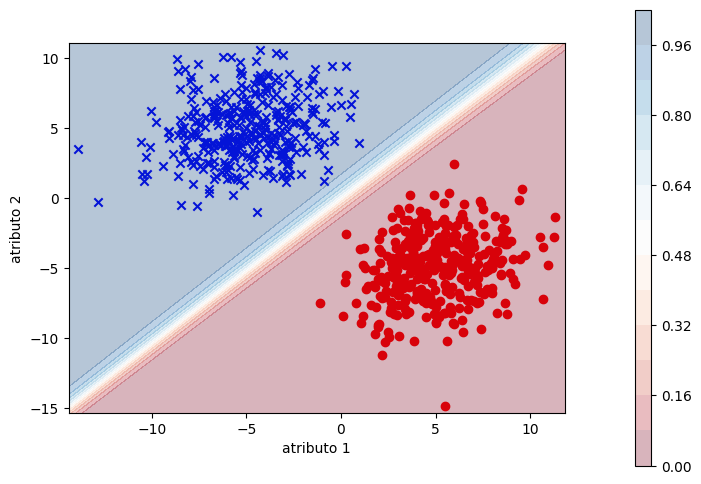

In [27]:
#@title Bayesiano ingenuo
X=visualizer.X
y=visualizer.y
# Clasificador Bayesiano ingenuo
cla = GaussianNB()
cla.fit(X,y) #ajustar modelo

my_plot_biclassifier(cla,X,y) #graficar contornos del modelo

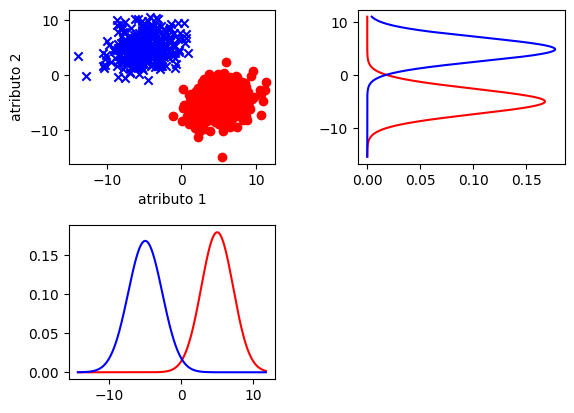

In [28]:
#@title Bayesiano ingenuo
X=visualizer.X
y=visualizer.y
#crear modelo Bayes Ingenuo
from sklearn.naive_bayes import GaussianNB
cla = GaussianNB()
cla.fit(X,y) #ajustar modelo
ye = cla.predict(X)#estimar etiquetas
#graficar datos y pdf estimadas
plt.subplot(221)
plt.scatter(X[(y==-1).ravel(),0],X[(y==-1).ravel(),1],c='r',marker='o')
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],c='b',marker='x')
plt.xlabel('atributo 1')
plt.ylabel('atributo 2')

#pdfs
var_ = cla.var_ #varianzas calculadas n_clases x n_atributos
mu_= cla.theta_#medias calculadas n_clases x n_atributos
mn11 =  mn(mu_[0,0], var_[0,0]) #
mn21 =  mn(mu_[1,0], var_[1,0]) #
mn12 =  mn(mu_[0,1], var_[0,1]) #
mn22 =  mn(mu_[1,1], var_[1,1]) #
#rejeilla valores
xx = np.arange(X[:,0].min()-0.5,X[:,0].max()+0.5,0.01)
yy = np.arange(X[:,1].min()-0.5,X[:,1].max()+0.5,0.01)
#evaluar pdfs
pdf11 = mn11.pdf(xx)
pdf21 = mn21.pdf(xx)
pdf12 = mn12.pdf(yy)
pdf22 = mn22.pdf(yy)

plt.subplot(222)
plt.plot(pdf12,yy,'r')
plt.plot(pdf22,yy,'b')
plt.ylabel('')
plt.xlabel('')

plt.subplot(223)
plt.plot(xx,pdf11,'r')
plt.plot(xx,pdf21,'b')
plt.xlabel('')
plt.ylabel('')
plt.subplots_adjust(wspace=0.4,hspace=0.4)

## Clasificador Bayesiano lineal y de diferencia entre medias.

- Si se fijan matrices de covarianza iguales $\mathbf{\Sigma}_A=\mathbf{\Sigma}_B=\mathbf{\Sigma}$ en el modelo cuadrático anterior, entonces:

$$f(\mathbf{x})= (\mathbf{\mu}_A-\mathbf{\mu}_B)^\top\mathbf{\Sigma}^{-1}\mathbf{x} + \rm{cte}$$

- En este sentido, el modelo de detección se convierte en una función lineal (Bayes lineal).

- En general, la matriz de covarianza se estima como $\mathbf{\Sigma}=p(A)\mathbf{\Sigma}_A+p(B)\mathbf{\Sigma}_B.$

- Además, si se asume matriz de covarianza identidad (Gaussian isotrópica), entonces:

$$f(\mathbf{x})= (\mathbf{\mu}_A-\mathbf{\mu}_B)^\top\mathbf{x} + \rm{cte}$$

- El anterior modelo se puede entender desde el punto de vista geométrico como la diferencia de similitudes entre el punto $\mathbf{x}$ y las respectivas medias, teniendo en cuenta que: $\mathbf{\mu}_c^\top\mathbf{x}=\langle\mathbf{\mu}_c,\mathbf{x}\rangle.$


In [6]:
#@title Clasificador Bayesiano lineal
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from ipywidgets import FloatSlider, Dropdown, Checkbox, interact

# Supongo que ya tienes definida la función `my_plot_biclassifier` y que `visualizer.X` y `visualizer.y` son tus datos.
X = visualizer.X
y = visualizer.y

# Función para actualizar el modelo con múltiples hiperparámetros
def update_lda(solver, shrinkage):
    # Definir el modelo con los hiperparámetros seleccionados
    cla = LinearDiscriminantAnalysis(solver=solver, shrinkage=shrinkage if solver != 'svd' else None)
    cla.fit(X, y)  # Ajustar el modelo

    # # Graficar la función de decisión
    # plt.figure(figsize=(8, 6))
    # my_plot_biclassifier(cla, X, y)
    # plt.title('Decision_Function')
    # plt.show()

    # Graficar las probabilidades predichas
    plt.figure(figsize=(8, 6))
    my_plot_biclassifier(cla, X, y, score_type='predict_proba')
    plt.title('Predict_Proba')
    plt.show()

# Crear widgets interactivos para los hiperparámetros
interact(update_lda,
         solver=Dropdown(options=['svd', 'lsqr', 'eigen'], value='svd', description='Solver'),
         shrinkage=Dropdown(options=[None, 'auto', 0.1, 0.5, 0.9], value=None, description='Shrinkage'),
        );


interactive(children=(Dropdown(description='Solver', options=('svd', 'lsqr', 'eigen'), value='svd'), Dropdown(…

In [29]:
#@title Clasificador logístico
X = visualizer.X
y = visualizer.y

# Función para actualizar el modelo LogisticRegression con los hiperparámetros seleccionados
def update_logistic_regression(C, penalty):
    # Definir el modelo con los hiperparámetros seleccionados
    cla = LogisticRegression(C=C, penalty=penalty, solver='liblinear', max_iter=1000)
    cla.fit(X, y)  # Ajustar el modelo

    # # Graficar la función de decisión
    # plt.figure(figsize=(8, 6))
    # my_plot_biclassifier(cla, X, y)
    # plt.title('Decision_Function')
    # plt.show()

    # Graficar las probabilidades predichas
    plt.figure(figsize=(8, 6))
    my_plot_biclassifier(cla, X, y, score_type='predict_proba')
    plt.title('Predict_Proba')
    plt.show()

# Crear widgets interactivos para los hiperparámetros C, penalty y solver
interact(update_logistic_regression,
         C=FloatSlider(min=0.001, max=1000, step=0.01, value=1, description='C'),
         penalty=Dropdown(options=['l2', 'l1'], value='l2', description='Penalty'));


interactive(children=(FloatSlider(value=1.0, description='C', max=1000.0, min=0.001, step=0.01), Dropdown(desc…

- La función de costo del modelo logísto plantea la ganancia de información a partir de los estimadores de los posteriores utilizando sigmoid:

$$L(\mathbf{x}|\mathbf{w},b)=\log\left(\frac{p(A|\mathbf{x})}{p(B|\mathbf{x})}\right)=\log(p(A|\mathbf{x}))-\log(p(B|\mathbf{x}))$$

- Asumiendo muestras independientes e identicamente distribuidas:

$$L(\mathbf{x}|\mathbf{w},b)=\prod_{n=1}^N\log(p(A|\mathbf{x}_n))-\log(p(B|\mathbf{x}_n))$$

- Los parámetros del modelo logístico se encuentra mediante optimización por gradiente descendiente. (Ver [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)).



## Clasificador Bayesiano mediante Gaussiana multivariada.
- Para codificar la dependencia entre atributos, se utiilza una Gaussiana multivariada.

- Se asume un problema bi-clase, con verosimilitudes estimadas según una Gaussiana multivariada#

$$\hat{p}(\mathbf{x}|A_c) = \frac{1}{2\pi^{P/2}|\Sigma_c|^{1/2}}\exp\left(\frac{-(\mathbf{x}-\mathbf{\mu}_c)^\top\Sigma_c^{-1}(\mathbf{x}-\mathbf{\mu}_c)}{2}\right)$$

donde la notación $|\Sigma_c|$ se refiere al determinante de la matriz de covarianza y $\mathbf{x},\mathbf{\mu}_c\in\mathbb{R}^P$ y $\mathbf{\Sigma}\in \mathbb{R}^{P\times P}$.

-Aplicando logaritmo a la regla de detección Bayesiana:

$$\log\left(\frac{P(\mathbf{x}|A)}{P(\mathbf{x}|B)}\right) >\log\left( \frac{P(B)}{P(A)}\right)$$

y reemplazando el estimador de las verosimilitudes por Gaussiana multivariada, se obtiene un nuevo score de decisión (frontera) para el caso de clasificación binaria, según:

$$f(\mathbf{x})= 0.5\left((\mathbf{x}-\mathbf{\mu}_B)^\top\mathbf{\Sigma}^{-1}_B(\mathbf{x}-\mathbf{\mu}_B)-(\mathbf{x}-\mathbf{\mu}_A)^\top\mathbf{\Sigma}_A^{-1}(\mathbf{x}-\mathbf{\mu}_A) +\log(|\mathbf{\Sigma}_B|)-\log(|\mathbf{\Sigma}_A|)\right) +\cdots\\ \cdots+\log(p(A))-\log(p(B))$$

- Si $f(\mathbf{x})\geq0$ $\hat{y}=A$, en otro caso $\hat{y}=B.$

- Note que la frontera depende de la [distancia de Mahalanobis](https://es.wikipedia.org/wiki/Distancia_de_Mahalanobis) entre la muestra y las medias de cada una de las clases.

- El clasificador Bayesiano mediante Gaussiana multivariada también se puede entender como un clasificador cuadrático desde el punto de vista geométrico.


In [31]:
#@title Clasificador Bayesiano cuadrático
# Supongo que ya tienes definida la función `my_plot_biclassifier` y que `visualizer.X` y `visualizer.y` son tus datos.
X = visualizer.X
y = visualizer.y

# Función para actualizar el modelo con múltiples hiperparámetros
def update_qda(reg_param, tol, store_covariance):
    cla = QuadraticDiscriminantAnalysis(store_covariance=store_covariance, reg_param=reg_param, tol=tol)
    cla.fit(X, y)  # Ajustar el modelo

    # Graficar la función de decisión
    #plt.figure(figsize=(8, 6))
    #my_plot_biclassifier(cla, X, y)
    #plt.title('Decision_Function')
    #plt.show()

    # Graficar las probabilidades predichas
    plt.figure(figsize=(8, 6))
    my_plot_biclassifier(cla, X, y, score_type='predict_proba')
    plt.title('Predict_Proba')
    plt.show()

# Crear sliders y checkbox interactivos para los hiperparámetros
interact(update_qda,
         reg_param=FloatSlider(min=0, max=1, step=0.01, value=0, description='reg_param'),
         tol=FloatSlider(min=1e-6, max=1e-1, step=1e-6, value=1e-4, description='tol'),
         store_covariance=Checkbox(value=True, description='store_covariance')
        );


interactive(children=(FloatSlider(value=0.0, description='reg_param', max=1.0, step=0.01), FloatSlider(value=0…

## Extensión clasificador de medias a k-vecinos más cercanos

- Aunque el clasificador de medias puede entenderse como una extensión Bayesiana, en la práctica se suele utilizar el concepto de distance a los K-vecinos más cercanos para determinar la membresia del punto.

- Por ende, si se desea encontrar la etiqueta de un nuevo punto, se determina un radio o número de vecinos de búsqueda, y se utiliza el estimador tipo moda para determinar la etiqueta de salida:

![knn](https://github.com/amalvarezme/AnaliticaDatos/blob/master/3_Clasificacion/knncla.png?raw=1)

- El clasificador por vecinos más cercanos ([KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) permite codificar nolinealidades y es flexible, no obstante, dado que depende de la distancia entre muestras, puede ser poco escalable a grandes cantidades de instancias.

In [33]:
#@title Clasificador por vecinos más cercanos
# Función para actualizar el modelo KNN con el número de vecinos seleccionado
class KNNVisualizer:
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.cla = None

    def plot_knn(self, n_neighbors):
        self.cla = KNeighborsClassifier(n_neighbors=n_neighbors)
        self.cla.fit(self.X, self.y)

        # Limpiar la figura antes de redibujar
        plt.figure(figsize=(8, 6))

        # Graficar la frontera de decisión
        my_plot_biclassifier(self.cla, self.X, self.y)

        # Mostrar el gráfico
        plt.title(f'KNN con {n_neighbors} vecinos')
        plt.show()

# Instanciar la clase KNNVisualizer
visualizer = KNNVisualizer(X, y)

# Uso de interact para modificar el número de vecinos
interact(visualizer.plot_knn, n_neighbors=IntSlider(min=1, max=20, step=1, value=5, description='Vecinos'))


interactive(children=(IntSlider(value=5, description='Vecinos', max=20, min=1), Output()), _dom_classes=('widg…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

**Ejercicio: Clasificación de modelos según sus fronteras de decisión**

1. **Agrupen los modelos** de clasificación en función de sus **fronteras de decisión**:
   - **Lineal**
   - **Cuadrática**
   - **Proximidad**

2. **Discusión**:
   - ¿Qué tipo de frontera creen que es más **flexible**?
   - Basen sus respuestas solo en la visualización de las fronteras de decisión.

# Árboles de decisión y bosques aleatorios

- Los árboles de decisión y los bosques aletorios pertenecen al grupo de algoritmos clásicos más potentes, junto con las máquinas de vectores de soporte.

- Su principio se centra en la generación de fronteras de decisión mediante umbralizaciones sobre las características.

- Un bosque aleatorio se puede entender como un método de ensamble, a partir de la repartición aleatoria de árboles de decisión que actúan en paralelo sobre distintos atributos, y la decisión final se obtiene mediante voto mayoritario o promedio.

![RandomForest](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/4_Clasificacion_Clustering_DR/randomforest.png?raw=1)



¡Bien! Ahora que hemos explorado la teoría, **probemos esto con la famosa base de datos Iris**. Esta base de datos es muy conocida en el mundo del aprendizaje automático y la estadística, ya que contiene información sobre 150 muestras de flores de iris, distribuidas en tres especies diferentes: **Setosa**, **Versicolor**, y **Virginica**.

Cada muestra tiene cuatro características:

1. **Largo del sépalo** (en cm)
2. **Ancho del sépalo** (en cm)
3. **Largo del pétalo** (en cm)
4. **Ancho del pétalo** (en cm)

El objetivo es clasificar cada flor en su especie basándonos en estas características. Aunque la relación entre algunas de estas características puede ser lineal, al aplicar técnicas de regresión o clasificación en la base de datos Iris, nos enfrentamos a desafíos que pueden requerir extender nuestros modelos para capturar relaciones más complejas.



In [34]:
#@title Generación de datos
# Carga de datos
data = load_iris()
X = data.data
y = data.target

# Clase para visualizar y obtener las características seleccionadas
class IrisVisualizer:
    def __init__(self, X, y, feature_names):
        self.X = X
        self.y = y
        self.feature_names = feature_names
        self.selected_features = None

    # Función para graficar y retornar los índices de las características seleccionadas
    def plot_features(self, feature_x, feature_y):
        plt.figure(figsize=(9, 3.5))

        # Primer gráfico
        plt.subplot(121)
        plt.plot(self.X[self.y == 0, feature_x], self.X[self.y == 0, feature_y], "yo", label="Iris setosa")
        plt.plot(self.X[self.y == 1, feature_x], self.X[self.y == 1, feature_y], "bs", label="Iris versicolor")
        plt.plot(self.X[self.y == 2, feature_x], self.X[self.y == 2, feature_y], "g^", label="Iris virginica")
        plt.xlabel(self.feature_names[feature_x], fontsize=14)
        plt.ylabel(self.feature_names[feature_y], fontsize=14)
        plt.legend(fontsize=12)

        # Segundo gráfico
        plt.subplot(122)
        plt.scatter(self.X[:, feature_x], self.X[:, feature_y], c="k", marker=".")
        plt.xlabel(self.feature_names[feature_x], fontsize=14)
        plt.tick_params(labelleft=False)
        plt.tight_layout()
        plt.show()

        # Guardar y retornar los índices seleccionados
        self.selected_features = (feature_x, feature_y)
        return self.selected_features

# Instanciar la clase
visualizer = IrisVisualizer(X, y, ['Longitud del sépalo (cm)',
 'Ancho del sépalo (cm)',
 'Longitud del pétalo (cm)',
 'Ancho del pétalo (cm)']
)

# Uso de interact para seleccionar características y obtener los índices
interact(visualizer.plot_features,
         feature_x=IntSlider(min=0, max=3, step=1, value=2, description='Feature X'),
         feature_y=IntSlider(min=0, max=3, step=1, value=3, description='Feature Y'))

# Para obtener los valores seleccionados por el usuario:
def get_selected_features():
    return visualizer.selected_features

# Luego puedes llamar a get_selected_features() para obtener los índices seleccionados


interactive(children=(IntSlider(value=2, description='Feature X', max=3), IntSlider(value=3, description='Feat…

In [35]:
# Método para la elección del usuario
indx,indy=visualizer.selected_features

In [36]:
#@title Árboles de decisión y bosques aleatorios
# Cargar el conjunto de datos Iris
iris = load_iris()
indx, indy = 2, 3  # Indices para las características de pétalo: longitud y ancho
X = iris.data[:, [indx, indy]]  # Usamos solo las características de los pétalos (longitud y ancho)
y = iris.target

# Función para graficar la frontera de decisión y nombrar las regiones
def plot_decision_boundary_with_labels(clf, X, y, axes=[0, 7.5, 0, 3], is_iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
#['longitud del sépalo (cm)',
# 'ancho del sépalo (cm)',
# ' (cm)',
# ' (cm)']

    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if plot_training:
        plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y == 2], X[:, 1][y == 2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if is_iris:
        plt.xlabel("Longitud del pétalo", fontsize=14)
        plt.ylabel("Ancho del pétalo", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

    # Etiquetar cada región con el nombre de la clase
    class_names = iris.target_names
    for class_val in np.unique(y_pred):
        # Encontrar el centro de la región de cada clase
        mask = (y_pred == class_val)
        x1_region = x1[mask]
        x2_region = x2[mask]
        plt.text(np.mean(x1_region), np.mean(x2_region), class_names[class_val], fontsize=12,
                 horizontalalignment='center', verticalalignment='center', color='black', fontweight='bold')

# Variable para almacenar el modelo entrenado
trained_model = None

# Función para actualizar el modelo y graficar
def update_tree(max_depth, criterion):
    global trained_model
    trained_model = DecisionTreeClassifier(max_depth=max_depth, criterion=criterion, random_state=42)
    trained_model.fit(X, y)

    plt.figure(figsize=(8, 4))
    plot_decision_boundary_with_labels(trained_model, X, y)
    plt.grid(True)
    plt.show()

    return trained_model  # Devolver el modelo entrenado

# Crear sliders y dropdown para los hiperparámetros
max_depth_slider = IntSlider(min=1, max=10, step=1, value=2, description='Max Depth:')
criterion_dropdown = Dropdown(options=['gini', 'entropy'], value='gini', description='Criterion:')

# Crear interactividad
interactive_plot = interactive_output(update_tree, {'max_depth': max_depth_slider, 'criterion': criterion_dropdown})

# Mostrar widgets
ui = VBox([max_depth_slider, criterion_dropdown, interactive_plot])
display(ui)

# Función para obtener el modelo entrenado
def get_trained_model():
    return trained_model


- Las umbralizaciones se pueden entender mediante el siguiente diagrama:

![UmbralesRF](https://github.com/amalvarezme/AnaliticaDatos/blob/master/3_Clasificacion/umbralesRF.png?raw=1)



- Los árboles de decisión y los bosques aleatorios basan su aprendizaje en la medida Gini impurity (Gini ideal $\to$ 0):

$$G_i = 1 - \sum^n_{k=1}p^2_{i,k}$$

- Por ejemplo, para el **Depth-2 (node 1)** del diagrama mostrado:

$$G_i = 1-(0/54)^2-(49/54)^2-(5/54)^2 = 0.168 $$



**La Optimización se realiza de forma heurística utiilzando el algoritmo [CART](https://machinelearningmastery.com/classification-and-regression-trees-for-machine-learning/)**.

## Predecir etiqueta y probabilidad de clase

- Se debe resaltar que las probabilidades dependen del nodo de decisión, más no de la muestra en si. Todas las muestras en un mismo nodo, tendrán la misma probabilidad de clase.

**Clase 0:** Iris setosa

**Clase 1:** Iris versicolor

**Clase 2:** Iris virginica

In [37]:
#Predecir etiqueta con probabilidad de clase
tree_clf=get_trained_model()
tree_clf.predict_proba([[3, 2],[2,1]])

array([[0.        , 0.33333333, 0.66666667],
       [1.        , 0.        , 0.        ]])

In [38]:
#Predecir etiqueta nueva
tree_clf.predict([[5, 1.5],[2,1]])

array([2, 0])

- Los datos atípicos, la escala de las características y las rotaciones del espacio de entrada, son algunos de los desafios referentes a los árboles de decisión y los bosques aleatorios.

In [40]:
#@title Problemas en el entrenamiento
# Generar datos
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

# Rotación
angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

# Función para graficar la frontera de decisión
def plot_decision_boundary(clf, X, y, axes=[-0.7, 0.7, -0.7, 0.7], legend=False):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "bs", label="Clase 0")
    plt.plot(X[:, 0][y == 2], X[:, 1][y == 2], "g^", label="Clase 1")
    plt.axis(axes)
    if legend:
        plt.legend(loc="lower right", fontsize=14)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

# Función para entrenar los modelos y mostrar las fronteras de decisión
def update_trees(max_depth, criterion):
    # Sin rotación
    tree_clf_s = DecisionTreeClassifier(max_depth=max_depth, criterion=criterion, random_state=42)
    tree_clf_s.fit(Xs, ys)

    # Con rotación
    tree_clf_sr = DecisionTreeClassifier(max_depth=max_depth, criterion=criterion, random_state=42)
    tree_clf_sr.fit(Xsr, ys)

    # Graficar
    plt.figure(figsize=(11, 4))
    plt.subplot(121)
    plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], legend=True)
    plt.title("Sin rotación")

    plt.subplot(122)
    plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], legend=True)
    plt.title("Con rotación")

    plt.tight_layout()
    plt.show()

    return tree_clf_s, tree_clf_sr  # Devolver los modelos entrenados

# Crear sliders y dropdown para los hiperparámetros
max_depth_slider = IntSlider(min=1, max=10, step=1, value=2, description='Max Depth:')
criterion_dropdown = Dropdown(options=['gini', 'entropy'], value='gini', description='Criterion:')

# Crear interactividad
interactive_plot = interactive_output(update_trees, {'max_depth': max_depth_slider, 'criterion': criterion_dropdown})

# Mostrar widgets
ui = VBox([max_depth_slider, criterion_dropdown, interactive_plot])
display(ui)


# Máquina de vectores de soporte
La SVM centra su problema de optimización en la maximización de la margen de separación, teniendo en cuenta los puntos relevantes (vectores de soporte), como aquellos más cercanos a la frontera de decisión:


$$\begin{aligned}
\min_{\mathbf{w},b}= &\frac{1}{2}\|\mathbf{w}\|^2_2\\
{\rm{s.t.}}& \,\,y_n(f(\mathbf{x}_n)-1)\geq 1; \quad \forall n\in\{1,2,\dots,N\}
\end{aligned}$$

con $f(\mathbf{x})= \mathbf{w}^\top \mathbf{x} + b$ y $y_n\in\{-1,+1\}.$

- La etiqueta estimada se puede reescribir como $y_n = {\rm{sgn}}(f(\mathbf{x})).$

![SVM Margin](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/4_Clasificacion_Clustering_DR/svm2.png?raw=1)




In [41]:
#@title SVM
# Cargar el conjunto de datos Iris
iris = datasets.load_iris()
X = iris.data[:, [indx, indy]]  # Usamos solo las características de los pétalos (longitud y ancho)
y = (iris["target"] == 0).astype(np.float64)  # Etiquetas de clasificación

# Inicializar los datos para el "mal modelo"
x0 = np.linspace(0, 5.5, 200)

# Función para graficar la frontera de decisión del SVM
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1 / w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

# Función para actualizar y graficar el mal modelo
def update_bad_model(slope, intercept):
    # Graficar el "mal modelo"
    plt.figure(figsize=(12, 2.7))

    plt.subplot(121)
    pred_1 = slope * x0 + intercept

    plt.plot(x0, pred_1, "g--", linewidth=2, label="Mal modelo")
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs", label="Iris-Versicolor")
    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "yo", label="Iris-Setosa")
    plt.xlabel("Longitud del pétalo", fontsize=14)
    plt.ylabel("Ancho del pétalo", fontsize=14)
    plt.legend(loc="upper left", fontsize=14)
    #plt.axis([0, 5.5, 0, 2])

    # Graficar la frontera de decisión del SVM
    svm_clf = SVC(kernel='linear', C=1e10)
    svm_clf.fit(X, y)
    plt.subplot(122)
    plot_svc_decision_boundary(svm_clf, 0, 5.5)
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs")
    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "yo")
    plt.xlabel("Longitud del pétalo", fontsize=14)
    #plt.axis([0, 5.5, 0, 2¿])

    plt.tight_layout()
    plt.show()

# Controles interactivos para ajustar el mal modelo
slope_slider = FloatSlider(min=-10, max=10, step=0.1, value=5, description='Pendiente')
intercept_slider = FloatSlider(min=-10, max=10, step=0.1, value=-20, description='Intercepto')

# Conectar los controles con la función de actualización
interactive_plot = interactive_output(update_bad_model, {
    'slope': slope_slider,
    'intercept': intercept_slider
})

# Mostrar la interfaz de usuario
ui = VBox([slope_slider, intercept_slider, interactive_plot])
display(ui)


![SVM Gif](https://miro.medium.com/v2/resize:fit:786/1*9scCm8UypqIr6XlQwC4hnw.gif)

In [42]:
#@title Hiperparámetro de penalidad
# Cargar datos Iris
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # Longitud y ancho de pétalos
y = (iris["target"] == 2).astype(np.float64)  # 1 si Iris-Virginica, 0 si no

# Función para graficar la frontera de decisión del SVM
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0] / w[1] * x0 - b / w[1]

    margin = 1 / w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA', edgecolors='k')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

# Función para actualizar el modelo y graficar
def update_plot(C):
    scaler = StandardScaler()
    svm_clf = LinearSVC(C=C, loss="hinge", random_state=42)

    scaled_svm_clf = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf),
    ])

    scaled_svm_clf.fit(X, y)

    # Convertir parámetros a no escalados
    b = svm_clf.decision_function([-scaler.mean_ / scaler.scale_])
    w = svm_clf.coef_[0] / scaler.scale_
    svm_clf.intercept_ = np.array([b])
    svm_clf.coef_ = np.array([w])

    # Encontrar vectores de soporte
    t = y * 2 - 1
    support_vectors_idx = (t * (X.dot(w) + b) < 1).ravel()
    svm_clf.support_vectors_ = X[support_vectors_idx]

    # Graficar resultados
    plt.figure(figsize=(6, 4))

    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "g^", label="Iris-Virginica")
    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "bs", label="Iris-Versicolor")
    plot_svc_decision_boundary(svm_clf, 4, 6)
    plt.xlabel("Longitud del pétalo", fontsize=14)
    plt.ylabel("Ancho del pétalo", fontsize=14)
    plt.legend(loc="upper left", fontsize=14)
    plt.title(f"$C = {C}$", fontsize=16)
    plt.axis([4, 6, 0.8, 2.8])

    plt.tight_layout()
    plt.show()

# Slider para ajustar el valor de C
C_slider = FloatSlider(value=1, min=1, max=100, step=1, description="C")

# Conectar el slider con la función de actualización
interactive_plot = interactive_output(update_plot, {"C": C_slider})

# Mostrar la interfaz de usuario
ui = VBox([C_slider, interactive_plot])
display(ui)


- La mayoría de problemas de clasificación presentan traslape entre clases, no es posible encontrar una margen dura (perfecta), que clasifique bien todos los puntos.

- Por ende, se plantea una regularización, mediante la incorporación de variables auxiliares (slack) que permiten moldear la margen dura a margen suave, buscando generalizar mejor la frontera ante clases traslapadas.

$$\begin{aligned}
\min_{\mathbf{w},b}= &\frac{1}{2}\|\mathbf{w}\|^2_2 + C \sum^N_{n=1} \xi_n &\\
{\rm{s.t.}}& \,\,y_n(f(\mathbf{x}_n)-1)\geq 1-\xi_n\\
& \,\, \xi_n \geq 0
\end{aligned}$$

- $C\in\mathbb{R}^+$ es un hyperparametro de penalidad (regularización).

- Las SVM aprovechan el concepto de mapeo a un espacio de Hilbert con kernel Reproductivo ([RKHS](https://en.wikipedia.org/wiki/Reproducing_kernel_Hilbert_space) en inglés) para codificar las nolineales de los datos de entrada y seguir generando un modelo lineal pero en el RKHS.


- Mapeo implícito: $$\phi(x_1) = x_1^2=x_2.$$

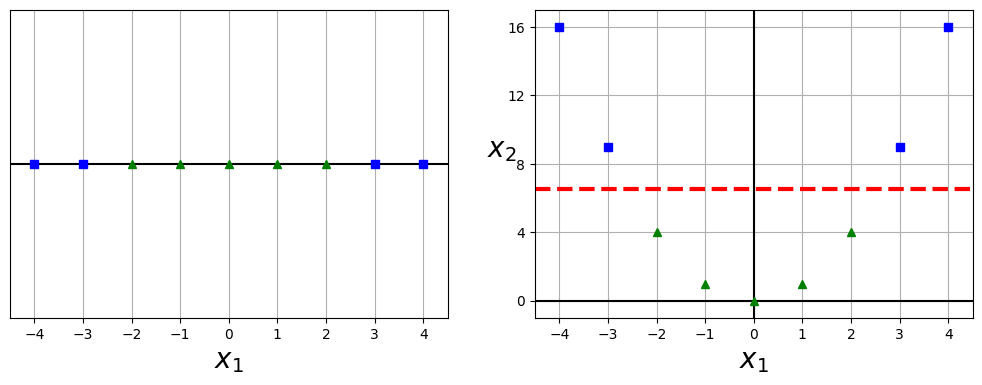

In [43]:
#@title Extensión no lineal
# Generar datos
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])
plt.subplots_adjust(right=1)
plt.show()

In [44]:
#@title Datos no linealmente separables
# Clase para visualizar los datos no linealmente separables
class MoonsVisualizer:
    def __init__(self):
        self.X = None
        self.y = None

    def plot_dataset(self, n_samples, noise):
        # Generar los datos de make_moons
        self.X, self.y = make_moons(n_samples=n_samples, noise=noise, random_state=42)

        # Graficar los datos
        plt.figure(figsize=(8, 4))
        plt.plot(self.X[:, 0][self.y == 0], self.X[:, 1][self.y == 0], "bs", label="Clase 0")
        plt.plot(self.X[:, 0][self.y == 1], self.X[:, 1][self.y == 1], "g^", label="Clase 1")
        plt.axis([-1.5, 2.5, -1, 1.5])
        plt.grid(True, which='both')
        plt.xlabel(r"$x_1$", fontsize=20)
        plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
        plt.legend()
        plt.show()

# Instanciar la clase
moons_visualizer = MoonsVisualizer()

# Uso de interact con la instancia del visualizador
interact(moons_visualizer.plot_dataset,
         n_samples=IntSlider(min=50, max=500, step=10, value=100, description="Samples"),
         noise=FloatSlider(min=0.0, max=0.5, step=0.01, value=0.15, description="Noise"))

# Ahora puedes acceder a X e y después de la visualización
# X, y = moons_visualizer.X, moons_visualizer.y


interactive(children=(IntSlider(value=100, description='Samples', max=500, min=50, step=10), FloatSlider(value…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

In [45]:
#@title SVM con kernel polinomial
# Generar los datos de make_moons
X = moons_visualizer.X
y = moons_visualizer.y
# Función para graficar los datos
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "bs", label="Clase 0")
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "g^", label="Clase 1")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
    plt.legend()

# Función para graficar las predicciones del SVM
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X_new).reshape(x0.shape)
    y_decision = clf.decision_function(X_new).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

# Función para actualizar el modelo SVM y graficar
def update_plot(degree, coef0, C):
    svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=degree, coef0=coef0, C=C))
    ])
    svm_clf.fit(X, y)

    plt.figure(figsize=(6, 4))
    plot_predictions(svm_clf, [-1.5, 2.5, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
    plt.title(r"$d={}, r={}, C={}$".format(degree, coef0, C), fontsize=18)
    plt.show()

# Widgets para ajustar los hiperparámetros
degree_slider = IntSlider(min=1, max=10, step=1, value=3, description="Grado")
coef0_slider = FloatSlider(min=1, max=100, step=0.1, value=1, description="Coef0")
C_slider = FloatSlider(min=1, max=10, step=1, value=5, description="C")

# Interactividad
interact(update_plot, degree=degree_slider, coef0=coef0_slider, C=C_slider)


interactive(children=(IntSlider(value=3, description='Grado', max=10, min=1), FloatSlider(value=1.0, descripti…

<function __main__.update_plot(degree, coef0, C)>

# Búsqueda de parámetros utilizando gridsearchCV

**Nota**: Recuerde que GridsearchCV utiliza validación cruzada para encontrar los mejores hiperparámetros según los rendimientos promedios en el conjunto de test (validación si se considera la partición original)


![cv](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/4_Clasificacion_Clustering_DR/grid_search_cross_validation.png?raw=1)
}

**¡Excelente!** Ahora, para culminar, **apliquemos todo lo aprendido utilizando la base de datos MNIST**. Este conjunto de datos es uno de los más famosos en el campo del aprendizaje automático y el procesamiento de imágenes. Contiene **60,000 imágenes en escala de grises** de dígitos escritos a mano (del 0 al 9), con un tamaño de 28x28 píxeles. Además, incluye un conjunto de prueba con **10,000 imágenes** adicionales.

Cada imagen en el conjunto de datos representa un dígito y está etiquetada con su valor correspondiente (de 0 a 9). El objetivo es **clasificar correctamente** cada imagen en el dígito que representa, usando técnicas como regresión logística, redes neuronales o modelos más avanzados que hemos explorado.

Este conjunto de datos es especialmente útil para practicar técnicas de clasificación de imágenes, donde la relación entre los píxeles de las imágenes no es lineal. s.


In [46]:
#@title MNIST
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from ipywidgets import IntSlider, FloatSlider, interact
import tensorflow as tf

# Cargar el dataset MNIST desde TensorFlow
(X_train_full, y_train_full), (X_test_full, y_test_full) = tf.keras.datasets.mnist.load_data()

# Normalizar los datos (convertir los valores de los píxeles a [0,1])
X_train_full = X_train_full.astype(np.float32) / 255.0
X_test_full = X_test_full.astype(np.float32) / 255.0

# Combinar los conjuntos de entrenamiento y prueba para permitir su partición interactiva
X_full = np.concatenate([X_train_full, X_test_full], axis=0)
y_full = np.concatenate([y_train_full, y_test_full], axis=0)

# Clase para manejar los datos y su partición
class MNISTVisualizer:
    def __init__(self, X_full, y_full):
        self.X_full = X_full
        self.y_full = y_full
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None

    # Función para partir los datos en entrenamiento y prueba
    def split_data(self, test_size):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X_full, self.y_full, test_size=test_size, random_state=42
        )
        return self.X_train, self.X_test, self.y_train, self.y_test

    # Función para mostrar un mosaico de imágenes de un dígito específico
    def plot_digit_mosaic(self, digit, test_size):
        self.split_data(test_size)

        # Filtrar las imágenes que corresponden al dígito seleccionado
        digit_indices = np.where(self.y_full == digit)[0]
        digit_images = self.X_full[digit_indices]

        # Mostrar un mosaico de las primeras 30 imágenes del dígito
        plt.figure(figsize=(10, 3))
        for index in range(30):
            plt.subplot(3, 10, index + 1)
            plt.imshow(digit_images[index], cmap="binary")
            plt.axis("off")
        plt.suptitle(f"Mosaico del número {digit} (Test Size: {test_size*100:.1f}%)", fontsize=16)
        plt.show()

# Crear instancia de la clase MNISTVisualizer
visualizer = MNISTVisualizer(X_full, y_full)

# Uso de interact para modificar el número seleccionado y el tamaño de prueba
interact(visualizer.plot_digit_mosaic,
         digit=IntSlider(min=0, max=9, step=1, value=0, description='Dígito'),
         test_size=FloatSlider(min=0.1, max=0.9, step=0.1, value=0.2, description='Test Size'));


interactive(children=(IntSlider(value=0, description='Dígito', max=9), FloatSlider(value=0.2, description='Tes…

In [47]:
# Método para obtener X_train, X_test, y_train, y_test después de la selección
Xtrain= visualizer.X_train.reshape(-1,28*28)
ytrain= visualizer.y_train
Xtest= visualizer.X_test.reshape(-1,28*28)
ytest= visualizer.y_test
print(Xtrain.shape,ytrain.shape,Xtest.shape,ytest.shape)

(56000, 784) (56000,) (14000, 784) (14000,)


In [48]:
#@title Validación cruzada
#
# Datos de entrada Xtrain, ytrain deben estar cargados

# Definir las opciones de clasificadores y sus hiperparámetros principales y adicionales
classifiers = {
    'Quadratic Discriminant Analysis': (QuadraticDiscriminantAnalysis(), 'cla__reg_param', FloatRangeSlider(min=0.0, max=1.0, step=0.1, value=[0.0, 0.1], description='Reg Param'), {}),
    'Logistic Regression': (LogisticRegression(), 'cla__C', FloatRangeSlider(min=0.001, max=1000, step=10, value=[1, 100], description='C'), {}),
    'KNeighbors': (KNeighborsClassifier(), 'cla__n_neighbors', IntRangeSlider(min=3, max=9, step=1, value=[5, 7], description='n_neighbors'), {
        'cla__weights': ['uniform', 'distance'],  # Fijar peso
        'cla__p': [1, 2]  # Fijar distancia de Minkowski
    }),
    'Decision Tree': (DecisionTreeClassifier(), 'cla__max_depth', IntRangeSlider(min=1, max=20, step=1, value=[5, 10], description='Max Depth'), {
        'cla__min_samples_split': [2, 5, 10]  # Fijar split mínimo
    }),
    'SVC': (SVC(), 'cla__C', FloatRangeSlider(min=0.001, max=1000, step=10, value=[1, 100], description='C'), {
        'cla__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Fijar el kernel
        'cla__gamma': [1e-3, 1e-2, 1e-1, 1, 10]  # Fijar gamma
    }),


}

# Crear checkboxes para seleccionar clasificadores
classifier_checkboxes = {clf_name: Checkbox(description=clf_name, value=False) for clf_name in classifiers.keys()}

# Dropdown para seleccionar si se aplica escalado y cuál aplicar
scaler_options = Dropdown(options=['None', 'MinMaxScaler', 'StandardScaler'], value='None', description='Scaler')

# Botón para ejecutar GridSearchCV para los modelos seleccionados
run_button = Button(description="Ejecutar búsqueda", button_style='success')
output = Output()

# Contenedor interactivo para los hiperparámetros
param_widgets = {}
selected_models = {}  # Diccionario para almacenar los modelos seleccionados y sus hiperparámetros

def update_param_widgets(change):
    """Actualizar los widgets de hiperparámetros según el clasificador seleccionado"""
    for clf_name, checkbox in classifier_checkboxes.items():
        if checkbox.value:
            _, param_name, widget, _ = classifiers[clf_name]
            param_widgets[clf_name] = widget
            selected_models[clf_name] = widget  # Guardar los modelos seleccionados en el diccionario
        else:
            param_widgets.pop(clf_name, None)
            selected_models.pop(clf_name, None)  # Eliminar si se deselecciona

    # Mostrar widgets de hiperparámetros seleccionados
    param_container.children = [param_widgets[clf_name] for clf_name in param_widgets.keys()]

# Asociar los cambios en los checkboxes a la función de actualización
for checkbox in classifier_checkboxes.values():
    checkbox.observe(update_param_widgets, names='value')

param_container = VBox()  # Contenedor para los widgets de hiperparámetros

def run_grid_search(event):
    """Función para ejecutar GridSearchCV en los modelos seleccionados"""
    with output:
        output.clear_output()  # Limpiar la salida previa
        result_list = []

        # Verificar si se ha seleccionado un escalador
        if scaler_options.value == 'MinMaxScaler':
            scaler = MinMaxScaler()
        elif scaler_options.value == 'StandardScaler':
            scaler = StandardScaler()
        else:
            scaler = None

        for clf_name, checkbox in classifier_checkboxes.items():
            if checkbox.value:  # Si el clasificador está seleccionado
                clf, param_name, widget, fixed_params = classifiers[clf_name]
                param_range = widget.value  # Obtener el rango del hiperparámetro configurado por el usuario

                # Crear pipeline con el escalador seleccionado
                if scaler:
                    pipeline = Pipeline([('nor', scaler), ('cla', clf)])
                else:
                    pipeline = Pipeline([('cla', clf)])

                # Definir el grid con el rango de hiperparámetros y los fijos
                param_grid = {param_name: list(param_range)}
                param_grid.update(fixed_params)

                print(f'Ejecutando búsqueda para {clf_name}...')

                # Ejecutar GridSearchCV
                grid_search = GridSearchCV(pipeline, param_grid, n_jobs=-1, cv=5, scoring='accuracy', refit=True, verbose=10)
                grid_search.fit(Xtrain[0:500], ytrain[0:500])

                # Guardar el mejor modelo
                filename = f'results/{clf_name}_best_model.pkl'
                joblib.dump(grid_search.best_estimator_, filename)
                result_list.append(f'Modelo guardado: {filename} | Mejor resultado: {grid_search.best_score_:.2f}')

        # Mostrar resultados
        for result in result_list:
            print(result)

def get_selected_models():
    """Función para obtener los modelos seleccionados"""
    return selected_models  # Retorna el diccionario con los modelos seleccionados y sus parámetros

# Asociar la ejecución de GridSearchCV al botón
run_button.on_click(run_grid_search)

# Mostrar la interfaz interactiva
display(VBox([
    HBox(list(classifier_checkboxes.values())),  # Mostrar los checkboxes de clasificadores
    scaler_options,  # Dropdown para seleccionar el escalador
    param_container,  # Widgets de hiperparámetros seleccionados
    run_button,  # Botón de ejecución
    output  # Salida de resultados
]))


In [49]:
#@title Evaluar modelos
#%% evaluar sobre Xtest
from sklearn.preprocessing import label_binarize
directory = '/content/results/'
path_img=''
label_models=list(get_selected_models().keys())
names=np.array([str(j) for j in range(10)])
# Listar todos los archivos en el directorio que terminan con .pkl
pkl_files = [f for f in os.listdir(directory) if f.endswith('.pkl')]

# Cargar todos los modelos
my_model_loaded = []
for file in pkl_files:
    model_path = os.path.join(directory, file)
    model_name = os.path.splitext(file)[0]  # Obtener el nombre del modelo sin la extensión
    my_model_loaded.append(joblib.load(model_path))

# Función para evaluar el modelo seleccionado
def evaluate_model(model_name):
    # Encontrar el índice del modelo seleccionado
    model_index = label_models.index(model_name)

    print('Evaluando modelo %s' % (label_models[model_index]))

    # Predecir con el modelo seleccionado
    ytest_e = my_model_loaded[model_index].predict(Xtest)
    acc = accuracy_score(ytest, ytest_e)

    # Mostrar la matriz de confusión
    plot_confusion_matrix(
        ytest, ytest_e,
        classes=names,
        title='ACC = %.1f %%' % (100 * acc)
    )
    plt.autoscale()
    plt.show()

    # Mostrar el reporte de clasificación
    cr = classification_report(
        ytest, ytest_e,
        labels=range(names.shape[0]),
        target_names=names
    )
    print(cr)

    # Binarizar las etiquetas
    ytrain_b = label_binarize(ytrain, classes=range(names.shape[0]))
    ytest_b = label_binarize(ytest, classes=range(names.shape[0]))

    # Calcular la curva ROC y AUC
    try:
        ytest_score = my_model_loaded[model_index].decision_function(Xtest)
        roc_auc, fpr, tpr, n_classes = roc_multiclass(ytest_b, ytest_score)
        roc_auc_mc(roc_auc, fpr, tpr, n_classes, 'ROC curve ' + label_models[model_index], path_img)
    except:
        ytest_score = my_model_loaded[model_index].predict_proba(Xtest)
        roc_auc, fpr, tpr, n_classes = roc_multiclass(ytest_b, ytest_score)
        roc_auc_mc(roc_auc, fpr, tpr, n_classes, 'ROC curve ' + label_models[model_index], path_img)

# Interactividad para seleccionar el modelo
interact(evaluate_model, model_name=Dropdown(options=label_models, description="Model:"))


interactive(children=(Dropdown(description='Model:', options=('Logistic Regression', 'KNeighbors', 'Decision T…

<function __main__.evaluate_model(model_name)>


**Ejercicio:** Explora las diferentes configuraciones para ajustar los diferentes modelos, variando el espacio de búsqueda de lo hiparámetros por medio del rango de los datos y analiza qué ocurre con el ajuste. **¿Podemos mejorar?**


¡Es hora de experimentar y descubrir qué configuración ofrece el mejor ajuste!
